In [776]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
pd.set_option("display.max_columns", 500)
import warnings
warnings.filterwarnings("ignore")

In [777]:
data=pd.read_json("SOIL_Krishi_response.json")
data = pd.DataFrame(data["results"].to_list())
all_crops = data["cropNameCommon"].unique()
all_crops

array(['chilli (rainfed)', 'chilli (irrigated)', 'groundnut  (rainfed)',
       'sunflower (rainfed)', 'sunflower (irrigated)', 'bengal gram',
       'green gram', 'foxtail millet'], dtype=object)

In [778]:
df1 = pd.read_csv("processed_df.csv")
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1 = df1[df1["targetYield"]!=0]
df1

,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato
19,1825,0.45,8.13,25.1,0.38,1.55,256.0,18253,0.33,0.47,17.4,0.48,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2000,0.86,8.15,56.7,0.36,2.04,261.0,35000,0.28,0.20,13.6,0.46,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0,0.69,7.59,48.3,0.20,6.77,318.0,25000,0.28,0.41,4.3,0.12,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0,0.76,7.10,17.1,0.26,1.56,303.0,30000,0.17,0.17,18.5,0.47,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0,0.70,8.40,25.3,0.32,1.41,224.0,30000,0.28,0.46,15.6,0.18,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,60000,0.85,6.06,49.3,0.31,6.20,258.0,120000,0.17,0.79,10.5,0.41,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3165,0,0.45,8.07,13.8,0.22,8.45,202.0,25000,0.28,0.34,15.2,0.46,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3171,15285,0.56,8.12,36.2,0.19,5.39,203.0,50000,0.17,0.48,20.9,0.39,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3172,1825,0.45,8.13,25.1,0.38,1.55,256.0,18253,0.33,0.47,17.4,0.48,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [779]:
df2 = pd.read_csv("df_with_predicted_TargetYields.csv")
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2

,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato,targetYield
0,0,0.900000,7.080000,28.300000,0.390000,7.740000,319.000000,0.330000,0.740000,20.800000,0.33000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18643.872924
1,0,0.870000,6.550000,29.300000,0.410000,3.450000,141.000000,0.170000,0.530000,19.200000,0.56000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8102.899982
2,0,0.770000,6.310000,41.200000,0.150000,6.640000,191.000000,0.330000,0.600000,10.000000,0.08000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27589.616478
3,0,0.660000,8.070000,38.000000,0.100000,10.420000,176.000000,0.170000,0.320000,8.500000,0.42000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19140.092244
4,0,0.790000,8.090000,15.500000,0.320000,1.340000,192.000000,0.220000,0.420000,9.900000,0.37000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20789.487699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,0,0.470000,8.090000,41.800000,0.390000,7.090000,252.000000,0.280000,0.330000,5.400000,0.39000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17816.378845
3026,0,0.880000,8.090000,24.800000,0.220000,8.180000,72.000000,0.220000,0.300000,4.900000,0.41000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7162.333357
3027,0,0.900000,8.180000,31.200000,0.320000,6.020000,231.000000,0.220000,0.460000,17.900000,0.32000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10635.038703
3028,0,0.660000,6.060000,19.500000,0.220000,8.420000,336.000000,0.220000,0.180000,4.500000,0.30000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9926.508378


In [780]:
df = pd.concat([df1, df2])
df

,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato
19,1825,0.450000,8.130000,25.100000,0.380000,1.550000,256.000000,18253.000000,0.330000,0.470000,17.400000,0.48000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2000,0.860000,8.150000,56.700000,0.360000,2.040000,261.000000,35000.000000,0.280000,0.200000,13.600000,0.46000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,0,0.690000,7.590000,48.300000,0.200000,6.770000,318.000000,25000.000000,0.280000,0.410000,4.300000,0.12000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0,0.760000,7.100000,17.100000,0.260000,1.560000,303.000000,30000.000000,0.170000,0.170000,18.500000,0.47000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0,0.700000,8.400000,25.300000,0.320000,1.410000,224.000000,30000.000000,0.280000,0.460000,15.600000,0.18000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,0,0.470000,8.090000,41.800000,0.390000,7.090000,252.000000,17816.378845,0.280000,0.330000,5.400000,0.39000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3026,0,0.880000,8.090000,24.800000,0.220000,8.180000,72.000000,7162.333357,0.220000,0.300000,4.900000,0.41000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3027,0,0.900000,8.180000,31.200000,0.320000,6.020000,231.000000,10635.038703,0.220000,0.460000,17.900000,0.32000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3028,0,0.660000,6.060000,19.500000,0.220000,8.420000,336.000000,9926.508378,0.220000,0.180000,4.500000,0.30000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Reversing OneHotEncoder

In [781]:
# Generate the list of one-hot-encoded columns programmatically
encoded_columns = [col for col in df.columns if col.startswith('cropNameCommon')]

# Reverse one-hot encoding using idxmax()
df['cropName'] = df[encoded_columns].idxmax(axis=1).apply(lambda x: x.replace('cropNameCommon_', '') if pd.notnull(x) else None)
df.loc[df[encoded_columns].sum(axis=1) == 0, 'cropName'] = None
df

,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato,cropName
19,1825,0.450000,8.130000,25.100000,0.380000,1.550000,256.000000,18253.000000,0.330000,0.470000,17.400000,0.48000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
20,2000,0.860000,8.150000,56.700000,0.360000,2.040000,261.000000,35000.000000,0.280000,0.200000,13.600000,0.46000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
174,0,0.690000,7.590000,48.300000,0.200000,6.770000,318.000000,25000.000000,0.280000,0.410000,4.300000,0.12000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (rainfed)
176,0,0.760000,7.100000,17.100000,0.260000,1.560000,303.000000,30000.000000,0.170000,0.170000,18.500000,0.47000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sunflower (rainfed)
177,0,0.700000,8.400000,25.300000,0.320000,1.410000,224.000000,30000.000000,0.280000,0.460000,15.600000,0.18000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (rainfed)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,0,0.470000,8.090000,41.800000,0.390000,7.090000,252.000000,17816.378845,0.280000,0.330000,5.400000,0.39000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3026,0,0.880000,8.090000,24.800000,0.220000,8.180000,72.000000,7162.333357,0.220000,0.300000,4.900000,0.41000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3027,0,0.900000,8.180000,31.200000,0.320000,6.020000,231.000000,10635.038703,0.220000,0.460000,17.900000,0.32000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3028,0,0.660000,6.060000,19.500000,0.220000,8.420000,336.000000,9926.508378,0.220000,0.180000,4.500000,0.30000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)


In [782]:
df.columns

Index(['previousYield', 'organicCarbon', 'pH', 'phosphorus', 'cu', 'fe',
       'potassium', 'targetYield', 'boron', 'zn', 'sulphur',
       'electricalConductivity', 'nitrogen',
       'cropNameCommon_chilli (irrigated)', 'cropNameCommon_chilli (rainfed)',
       'cropNameCommon_foxtail millet', 'cropNameCommon_green gram',
       'cropNameCommon_groundnut  (rainfed)',
       'cropNameCommon_sunflower (irrigated)',
       'cropNameCommon_sunflower (rainfed)',
       'previousCropName_chilli (rainfed)', 'previousCropName_coriander',
       'previousCropName_cotton', 'previousCropName_foxtail millet',
       'previousCropName_green gram', 'previousCropName_groundnut (irrigated)',
       'previousCropName_maize', 'previousCropName_sorghum (irrigated)',
       'previousCropName_sorghum/jowar (irrigated)',
       'previousCropName_sunflower (irrigated)',
       'previousCropName_sunflower (rainfed)', 'previousCropName_tomato',
       'cropName'],
      dtype='object')

In [783]:
print(df["cropName"].unique(), df["cropName"].nunique())

# df["cropName"].isna().sum()

['chilli (irrigated)' 'chilli (rainfed)' 'sunflower (rainfed)'
 'foxtail millet' 'groundnut  (rainfed)' 'sunflower (irrigated)' None
 'green gram'] 7


Adding the cropName which was dropped by drop_first=True while one hot encoding

In [784]:
all_crops

array(['chilli (rainfed)', 'chilli (irrigated)', 'groundnut  (rainfed)',
       'sunflower (rainfed)', 'sunflower (irrigated)', 'bengal gram',
       'green gram', 'foxtail millet'], dtype=object)

In [785]:
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)
df

,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato,cropName
0,1825,0.450000,8.130000,25.100000,0.380000,1.550000,256.000000,18253.000000,0.330000,0.470000,17.400000,0.48000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
1,2000,0.860000,8.150000,56.700000,0.360000,2.040000,261.000000,35000.000000,0.280000,0.200000,13.600000,0.46000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
2,0,0.690000,7.590000,48.300000,0.200000,6.770000,318.000000,25000.000000,0.280000,0.410000,4.300000,0.12000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (rainfed)
3,0,0.760000,7.100000,17.100000,0.260000,1.560000,303.000000,30000.000000,0.170000,0.170000,18.500000,0.47000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sunflower (rainfed)
4,0,0.700000,8.400000,25.300000,0.320000,1.410000,224.000000,30000.000000,0.280000,0.460000,15.600000,0.18000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (rainfed)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,0,0.470000,8.090000,41.800000,0.390000,7.090000,252.000000,17816.378845,0.280000,0.330000,5.400000,0.39000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3221,0,0.880000,8.090000,24.800000,0.220000,8.180000,72.000000,7162.333357,0.220000,0.300000,4.900000,0.41000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3222,0,0.900000,8.180000,31.200000,0.320000,6.020000,231.000000,10635.038703,0.220000,0.460000,17.900000,0.32000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)
3223,0,0.660000,6.060000,19.500000,0.220000,8.420000,336.000000,9926.508378,0.220000,0.180000,4.500000,0.30000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chilli (irrigated)


In [786]:
# List of columns to check for zeros
cols_to_check = [
    'cropNameCommon_chilli (irrigated)', 'cropNameCommon_chilli (rainfed)',
    'cropNameCommon_foxtail millet', 'cropNameCommon_green gram',
    'cropNameCommon_groundnut  (rainfed)', 'cropNameCommon_sunflower (irrigated)',
    'cropNameCommon_sunflower (rainfed)'
]

df[df[cols_to_check].apply(lambda row: (row == 0).all(), axis=1)]


,previousYield,organicCarbon,pH,phosphorus,cu,fe,potassium,targetYield,boron,zn,sulphur,electricalConductivity,nitrogen,cropNameCommon_chilli (irrigated),cropNameCommon_chilli (rainfed),cropNameCommon_foxtail millet,cropNameCommon_green gram,cropNameCommon_groundnut (rainfed),cropNameCommon_sunflower (irrigated),cropNameCommon_sunflower (rainfed),previousCropName_chilli (rainfed),previousCropName_coriander,previousCropName_cotton,previousCropName_foxtail millet,previousCropName_green gram,previousCropName_groundnut (irrigated),previousCropName_maize,previousCropName_sorghum (irrigated),previousCropName_sorghum/jowar (irrigated),previousCropName_sunflower (irrigated),previousCropName_sunflower (rainfed),previousCropName_tomato,cropName
278,0,0.85,5.1,59.9,0.37,1.33,294.0,16978.732098,0.22,0.79,19.9,0.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
779,0,0.85,5.1,59.9,0.37,1.33,294.0,16978.732098,0.22,0.79,19.9,0.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2215,0,0.85,5.1,59.9,0.37,1.33,294.0,16978.732098,0.22,0.79,19.9,0.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


###### Now all 8 crops are there in the cropName column

In [787]:
df.loc[df["cropName"].isna(), "cropName"] = "bengal gram"
print(df["cropName"].unique(), df["cropName"].nunique())

['chilli (irrigated)' 'chilli (rainfed)' 'sunflower (rainfed)'
 'foxtail millet' 'groundnut  (rainfed)' 'sunflower (irrigated)'
 'bengal gram' 'green gram'] 8


In [788]:
earlier_encoded_cols = [ 'cropNameCommon_chilli (irrigated)', 'cropNameCommon_chilli (rainfed)',
       'cropNameCommon_foxtail millet', 'cropNameCommon_green gram',
       'cropNameCommon_groundnut  (rainfed)',
       'cropNameCommon_sunflower (irrigated)',
       'cropNameCommon_sunflower (rainfed)']
df = df.drop(earlier_encoded_cols, axis=1)
df.columns

Index(['previousYield', 'organicCarbon', 'pH', 'phosphorus', 'cu', 'fe',
       'potassium', 'targetYield', 'boron', 'zn', 'sulphur',
       'electricalConductivity', 'nitrogen',
       'previousCropName_chilli (rainfed)', 'previousCropName_coriander',
       'previousCropName_cotton', 'previousCropName_foxtail millet',
       'previousCropName_green gram', 'previousCropName_groundnut (irrigated)',
       'previousCropName_maize', 'previousCropName_sorghum (irrigated)',
       'previousCropName_sorghum/jowar (irrigated)',
       'previousCropName_sunflower (irrigated)',
       'previousCropName_sunflower (rainfed)', 'previousCropName_tomato',
       'cropName'],
      dtype='object')

In [789]:
df["cropName"].value_counts()

cropName
chilli (rainfed)         2307
chilli (irrigated)        861
sunflower (rainfed)        24
sunflower (irrigated)      15
green gram                  9
foxtail millet              3
groundnut  (rainfed)        3
bengal gram                 3
Name: count, dtype: int64

Perform Train-test Split

Should always perform scaling and encoding after splitting your data into training and testing sets to avoid data leakage; this means splitting your data into train and test sets first, then applying scaling and encoding separately to each set using the parameters calculated only from the training data. 

In [790]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame `df` and a target column 'cropName'
X = df.drop(columns=['cropName'])
y = df['cropName']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handling Imbalanced Classes - Resampling the Training set!

In [791]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(k_neighbors=1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution of the target variable
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())

Original class distribution:
 cropName
chilli (rainfed)         1855
chilli (irrigated)        679
sunflower (rainfed)        20
sunflower (irrigated)      11
green gram                  8
groundnut  (rainfed)        3
foxtail millet              2
bengal gram                 2
Name: count, dtype: int64
Resampled class distribution:
 cropName
chilli (rainfed)         1855
chilli (irrigated)       1855
sunflower (rainfed)      1855
sunflower (irrigated)    1855
groundnut  (rainfed)     1855
green gram               1855
foxtail millet           1855
bengal gram              1855
Name: count, dtype: int64


Applying Scaling Transformation to independent features (X) of Train and Test Sets!

In [792]:
 #Scaling after train-test split
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)

with open('ann_scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

One Hot Encoding the resampled dependent/target variable (y=cropName)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
# Fit the encoder on the training labels (resampled)
y_train_encoded = encoder.fit_transform(y_train_resampled.values.reshape(-1, 1)).toarray()

# Transform the test labels (consistent with training labels)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

with open('ann_onehot_encoder_cropName.pkl','wb') as file:
    pickle.dump(encoder,file)

In [794]:
print(df.shape)
print(len(X_train), len(X_test))
print(len(X_train_resampled), len(y_train_resampled)) 
print(len(y_train_encoded), len(y_test_encoded))

(3225, 26)
2580 645
14840 14840
14840 645


#### Original Dataset shape
(3225, 33)

#### Test-Train Split: 80% Train Data and 20% Test Data
  - Train Set Length : (80/100)*3225 = 2580
  - Test Set Length : (20/100)*3225 = 645

#### Resampling the Training set!
SMOTE generates synthetic samples for the minority classes in y_train to balance all classes to the size of the majority class. (in our case majority_class = chilli (rainfed) with count as 1855)
So SMOTE generates samples for all other classes so that the sample count for each class is 1855. 
We have 8 classes of crops in total. So, 1855*8 = 14840 is the total number of samples(rows) in the training set. Hence,
  - Resampled train set length : 14840, which means,  
  - X_train_resampled Length : 14840
  - y_train_resampled Length : 14840

 #### Enconding the target variable
  - Training Target (y_train_encoded): After resampling, y_train_resampled has 14840 rows. One-hot encoding converts this into a matrix with 14840 rows and 7 columns (for 8 categories, with drop='first').
  - Test Target (y_test_encoded): Test set remains untouched, so y_test has 645 rows. After one-hot encoding, y_test_encoded becomes a matrix with 645 rows and 7 columns.
  - Hence, 
    y_train_encoded length : 14840
    y_test_encoded : 645


# ANN Implementation

In [795]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [796]:
## Build Our ANN Model 
# Batch Normalization and L2 Regularization for handling overfitting
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train_scaled.shape[1],), kernel_regularizer='l2'), ## HL1 Connected wwith input layer
    BatchNormalization(),
    Dropout(0.4),
    Dense(32,activation='relu', kernel_regularizer='l2'), ## HL2
    BatchNormalization(),
    Dropout(0.4),
    Dense(y_train_encoded.shape[1],activation='softmax')  ## output layer
])

In [797]:
# Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [798]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 64)                1664      
                                                                 
 batch_normalization_17 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_18 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 32)              

In [799]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [800]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [801]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_encoded,
    validation_data=(X_test_scaled,y_test_encoded),
    epochs=50,         # Adjust based on performance
    batch_size=32,     # Adjust for efficiency
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/50
464/464 [==============================] - 2s 2ms/step - loss: 2.4086 - accuracy: 0.3573 - val_loss: 3.0379 - val_accuracy: 0.1349
Epoch 2/50
464/464 [==============================] - 1s 2ms/step - loss: 1.8730 - accuracy: 0.5263 - val_loss: 2.7265 - val_accuracy: 0.1752
Epoch 3/50
464/464 [==============================] - 1s 2ms/step - loss: 1.5997 - accuracy: 0.6092 - val_loss: 2.4948 - val_accuracy: 0.2279
Epoch 4/50
464/464 [==============================] - 1s 2ms/step - loss: 1.4257 - accuracy: 0.6499 - val_loss: 2.2640 - val_accuracy: 0.2868
Epoch 5/50
464/464 [==============================] - 1s 2ms/step - loss: 1.3031 - accuracy: 0.6784 - val_loss: 2.0589 - val_accuracy: 0.3426
Epoch 6/50
464/464 [==============================] - 1s 2ms/step - loss: 1.1854 - accuracy: 0.6954 - val_loss: 1.9049 - val_accuracy: 0.3891
Epoch 7/50
464/464 [==============================] - 1s 2ms/step - loss: 1.1053 - accuracy: 0.7141 - val_loss: 1.7594 - val_accuracy: 0.4419
Epoch 

In [802]:
model.save('ann_model.h5') # h5 file is compatible with keras, so model created in h5 file

In [803]:
## Load Tensorboard Extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [804]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 31392), started 1 day, 15:55:51 ago. (Use '!kill 31392' to kill it.)

In [805]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predictions
y_pred_encoded = model.predict(X_test_scaled)  # Probabilities for each class
y_pred_classes = np.argmax(y_pred_encoded, axis=1)  # Convert to class labels
y_test_classes = np.argmax(y_test_encoded, axis=1)  # Original test class labels

# Classification report
from sklearn.metrics import classification_report, accuracy_score
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Test Accuracy: 73.02%
21/21 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.81      0.70       183
           1       0.90      0.70      0.78       452
           2       0.20      1.00      0.33         1
           3       0.09      1.00      0.17         1
           5       0.27      1.00      0.42         4
           6       0.09      0.50      0.15         4

    accuracy                           0.73       645
   macro avg       0.36      0.83      0.43       645
weighted avg       0.81      0.73      0.75       645



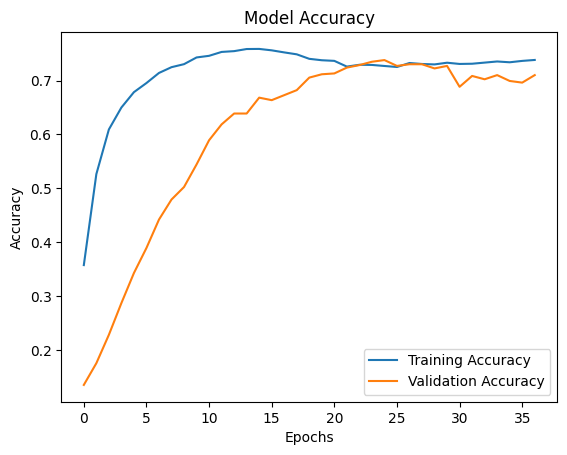

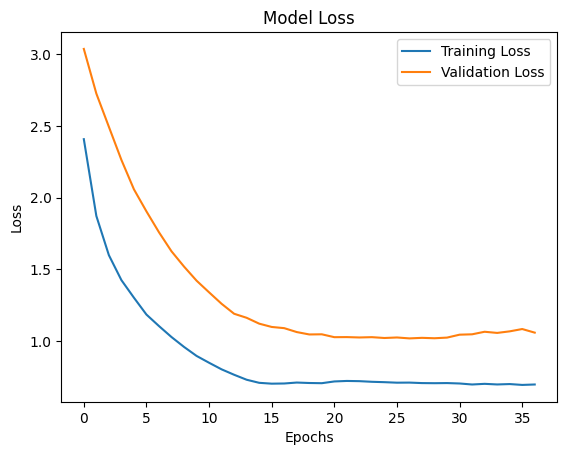

In [806]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()